# The Sparks Foundation 
# Data Science & Business Analytics Internship | GRIPAPR21
# Task1- Prediction using Supervised Machine Learning
**Predict the percentage of a student based on the number of study hours.**


**Author: Minahil Zia**

## Step 1: Importing The Libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Step 2. Import the Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [5]:
df.head() # Top Value of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.tail()  #Bottom value of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.info() #insights of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe() #statistical summary of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.size

50

In [11]:
df.shape

(25, 2)

In [12]:
df.isnull().sum() # check for null value

Hours     0
Scores    0
dtype: int64

## Step 3 Data Visulization


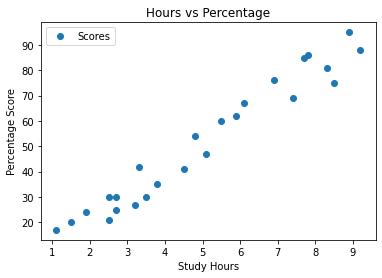

In [16]:
df.plot(x='Hours', y='Scores', style='o')  #plotting distribution of score
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

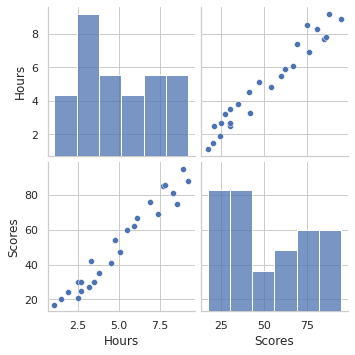

In [28]:
sns.pairplot(df)
    

## Step 4: Preparing the Data

In [30]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

## Step 5: Training DataSet

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


In [37]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
regressor.intercept_
regressor.coef_

array([10.16091281])

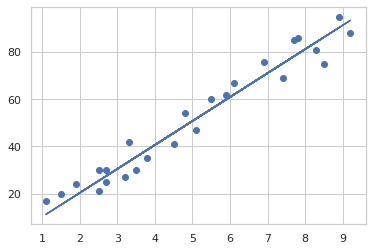

In [51]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Step 6 : Model Prediction

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  #Comaprison of actual and predicted values

In [54]:
df

,Actual,Predicted
0,20,15.196957
1,27,32.470509
2,69,75.146343
3,30,25.357870
4,62,59.904974


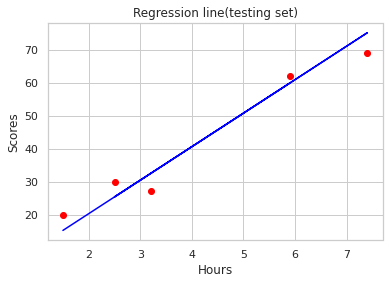

In [56]:
plt.scatter(X_test, y_test, color =  'red', marker='o' )
plt.plot(X_test,y_pred,color='blue')
plt.title("Regression line(testing set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Step 7: Evaluating the Model

In [59]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.94403159742541


## Errors

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.631410181392627
Mean Squared Error: 23.34234501474144
Root Mean Squared Error: 4.831391622994501
